# 01 Import libraries

In [98]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [99]:
# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

# 02 Import Data

In [100]:
path = r'/Users/woodoooo/Desktop/World University Rankings'
file = os.path.join(path, '02_Data', 'Prepared Data', 'QS_Rankings_selected_col_cleaned.xlsx')
df = pd.read_excel(file)

# 03 Splitting data in 4 quartiles

In [101]:
# Columns you want to keep
cols = ['Rank_num', 'Name', 'Country/Territory', 'Region', 'Size', 'Focus', 'Research', 'Status',
        'AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE', 'IFR SCORE', 
        'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 'EO SCORE', 'SUS SCORE', 'Overall SCORE']

# Sort by rank (important for quartiles)
df = df.sort_values(by="Rank_num")

# Compute quartile thresholds
q1 = int(len(df) * 0.25)
q2 = int(len(df) * 0.50)
q3 = int(len(df) * 0.75)

# Split into quartiles
df1scores = df.iloc[:q1][cols]     # Top 25% universities
df2scores = df.iloc[q1:q2][cols]   # 25–50%
df3scores = df.iloc[q2:q3][cols]   # 50–75%
df4scores = df.iloc[q3:][cols]     # Bottom 25%

# 04 Correlation checks per each quartile

In [102]:
# Correlation for Top 25% (Q1)
corr_value_df1 = df1scores['ER SCORE'].corr(df1scores['EO SCORE'])
print(f"Correlation between ER_SCORE and EO_SCORE (Top 25% – Q1): {corr_value_df1:.4f}")

# Correlation for 25–50% (Q2)
corr_value_df2 = df2scores['ER SCORE'].corr(df2scores['EO SCORE'])
print(f"Correlation between ER_SCORE and EO_SCORE (25–50% – Q2): {corr_value_df2:.4f}")

# Correlation for 50–75% (Q3)
corr_value_df3 = df3scores['ER SCORE'].corr(df3scores['EO SCORE'])
print(f"Correlation between ER_SCORE and EO_SCORE (50–75% – Q3): {corr_value_df3:.4f}")

# Correlation for Bottom 25% (Q4)
corr_value_df4 = df4scores['ER SCORE'].corr(df4scores['EO SCORE'])
print(f"Correlation between ER_SCORE and EO_SCORE (Bottom 25% – Q4): {corr_value_df4:.4f}")

Correlation between ER_SCORE and EO_SCORE (Top 25% – Q1): 0.4653
Correlation between ER_SCORE and EO_SCORE (25–50% – Q2): 0.3206
Correlation between ER_SCORE and EO_SCORE (50–75% – Q3): 0.2588
Correlation between ER_SCORE and EO_SCORE (Bottom 25% – Q4): 0.1525


now your quartile splits are consistent, and the correlations tell a clear story:

Q1 (Top 25%) → 0.4653 (strongest correlation)

Q2 (25–50%) → 0.3206

Q3 (50–75%) → 0.2588

Q4 (Bottom 25%) → 0.1525 (weakest correlation)

📊 Interpretation:
The correlation between Employer Reputation (ER) and Employment Outcomes (EO) is much stronger in top-ranked universities. As you go down the ranking quartiles, the relationship weakens.

That suggests:

At elite universities, employer perception (ER) is closely tied to graduate outcomes (EO).

In lower-ranked universities, employer reputation plays a smaller role in predicting employment outcomes — maybe other factors dominate.

In [103]:
# =======================
# Correlation FSR ↔ EO
# =======================

# Q1 (Top 25%)
corr_value_df1 = df1scores['FSR SCORE'].corr(df1scores['EO SCORE'])
print(f"Correlation between FSR_SCORE and EO_SCORE (Top 25% – Q1): {corr_value_df1:.4f}")

# Q2 (25–50%)
corr_value_df2 = df2scores['FSR SCORE'].corr(df2scores['EO SCORE'])
print(f"Correlation between FSR_SCORE and EO_SCORE (25–50% – Q2): {corr_value_df2:.4f}")

# Q3 (50–75%)
corr_value_df3 = df3scores['FSR SCORE'].corr(df3scores['EO SCORE'])
print(f"Correlation between FSR_SCORE and EO_SCORE (50–75% – Q3): {corr_value_df3:.4f}")

# Q4 (Bottom 25%)
corr_value_df4 = df4scores['FSR SCORE'].corr(df4scores['EO SCORE'])
print(f"Correlation between FSR_SCORE and EO_SCORE (Bottom 25% – Q4): {corr_value_df4:.4f}")


# =======================
# Correlation SUS ↔ ER
# =======================

# Q1 (Top 25%)
corr_sus_er_df1 = df1scores['SUS SCORE'].corr(df1scores['ER SCORE'])
print(f"Correlation between SUS_SCORE and ER_SCORE (Top 25% – Q1): {corr_sus_er_df1:.4f}")

# Q2 (25–50%)
corr_sus_er_df2 = df2scores['SUS SCORE'].corr(df2scores['ER SCORE'])
print(f"Correlation between SUS_SCORE and ER_SCORE (25–50% – Q2): {corr_sus_er_df2:.4f}")

# Q3 (50–75%)
corr_sus_er_df3 = df3scores['SUS SCORE'].corr(df3scores['ER SCORE'])
print(f"Correlation between SUS_SCORE and ER_SCORE (50–75% – Q3): {corr_sus_er_df3:.4f}")

# Q4 (Bottom 25%)
corr_sus_er_df4 = df4scores['SUS SCORE'].corr(df4scores['ER SCORE'])
print(f"Correlation between SUS_SCORE and ER_SCORE (Bottom 25% – Q4): {corr_sus_er_df4:.4f}")


Correlation between FSR_SCORE and EO_SCORE (Top 25% – Q1): 0.1138
Correlation between FSR_SCORE and EO_SCORE (25–50% – Q2): -0.0634
Correlation between FSR_SCORE and EO_SCORE (50–75% – Q3): -0.1526
Correlation between FSR_SCORE and EO_SCORE (Bottom 25% – Q4): -0.0861
Correlation between SUS_SCORE and ER_SCORE (Top 25% – Q1): 0.2614
Correlation between SUS_SCORE and ER_SCORE (25–50% – Q2): -0.0485
Correlation between SUS_SCORE and ER_SCORE (50–75% – Q3): -0.0391
Correlation between SUS_SCORE and ER_SCORE (Bottom 25% – Q4): -0.0910


FSR (Faculty/Student Ratio) ↔ EO (Employment Outcomes)

Q1 (Top 25%) → 0.1138 → weak positive correlation

Q2 (25–50%) → -0.0634 → weak negative correlation

Q3 (50–75%) → -0.1526 → stronger negative correlation

Q4 (Bottom 25%) → -0.0861 → weak negative correlation

Interpretation: At the very top, a slightly better faculty/student ratio is somewhat linked to employment outcomes, but beyond Q1 the correlation turns negative. This suggests that for mid- and lower-ranked universities, having more faculty per student doesn’t translate into stronger employment outcomes — maybe other factors (like reputation or industry ties) matter more.

SUS (Sustainability) ↔ ER (Employer Reputation)

Q1 (Top 25%) → 0.2614 → moderate positive correlation

Q2 (25–50%) → -0.0485 → near zero / weak negative

Q3 (50–75%) → -0.0391 → near zero / weak negative

Q4 (Bottom 25%) → -0.0910 → weak negative

In the elite group (Q1), universities with stronger sustainability efforts also enjoy better employer reputation. But outside the top quartile, the relationship disappears — employers likely don’t link sustainability with reputation for mid- and lower-tier schools.

Together with your ER↔EO analysis earlier, a clear pattern emerges:

Elite universities (Q1) → multiple indicators (ER↔EO, FSR↔EO, SUS↔ER) show stronger correlations.

Lower tiers (Q2–Q4) → correlations weaken or even turn negative, suggesting that prestige and outcomes at the very top are interconnected, but the link breaks down further down the rankings.

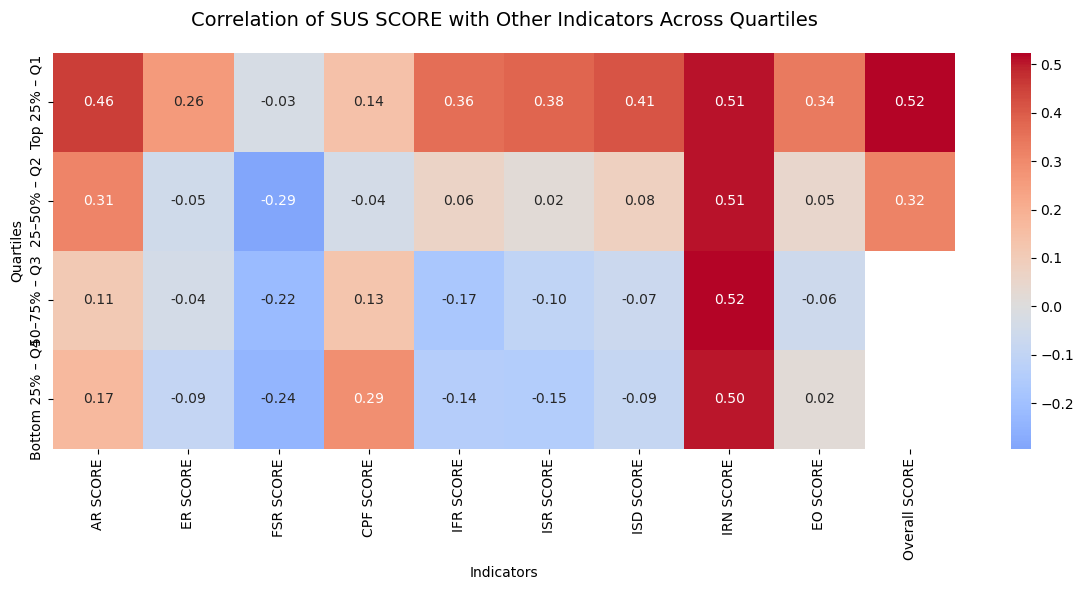

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Build summary DataFrame with SUS correlations per quartile
data = {
    "AR SCORE": [0.456296, 0.311135, 0.113540, 0.166339],
    "ER SCORE": [0.261447, -0.048470, -0.039131, -0.090999],
    "FSR SCORE": [-0.026760, -0.293855, -0.222049, -0.240795],
    "CPF SCORE": [0.143030, -0.037676, 0.129800, 0.289118],
    "IFR SCORE": [0.362293, 0.063094, -0.169604, -0.137520],
    "ISR SCORE": [0.382986, 0.016725, -0.104453, -0.146469],
    "ISD SCORE": [0.412393, 0.077264, -0.066145, -0.087952],
    "IRN SCORE": [0.509203, 0.508666, 0.523561, 0.501807],
    "EO SCORE": [0.337730, 0.047758, -0.059288, 0.016076],
    "Overall SCORE": [0.517231, 0.315210, None, None],
}

summary_df = pd.DataFrame(data, index=["Top 25% – Q1", "25–50% – Q2", "50–75% – Q3", "Bottom 25% – Q4"])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(summary_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation of SUS SCORE with Other Indicators Across Quartiles", fontsize=14, pad=20)
plt.ylabel("Quartiles")
plt.xlabel("Indicators")
plt.tight_layout()
plt.show()


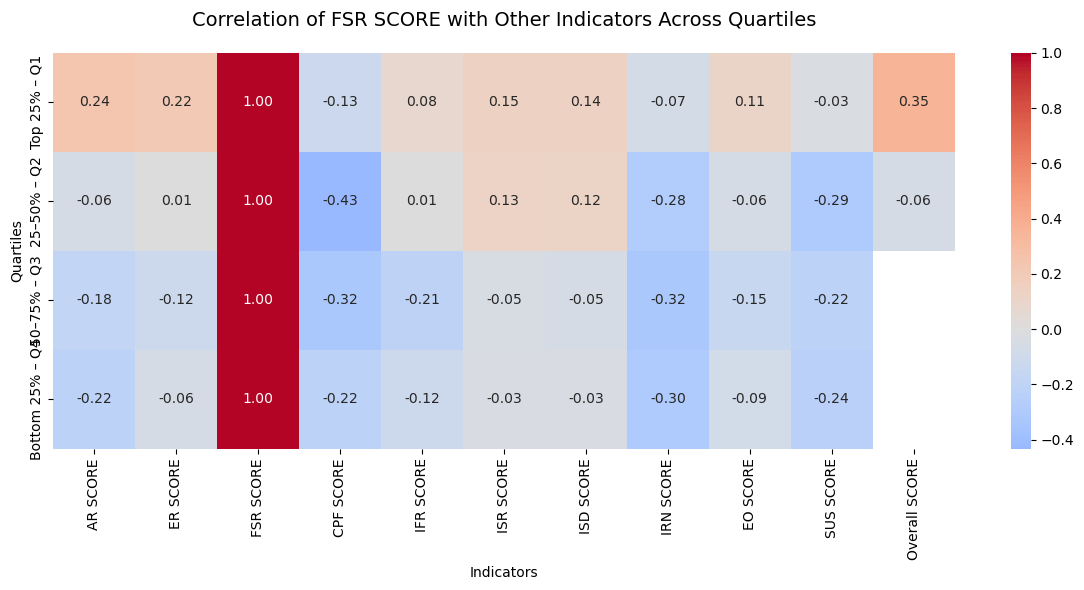

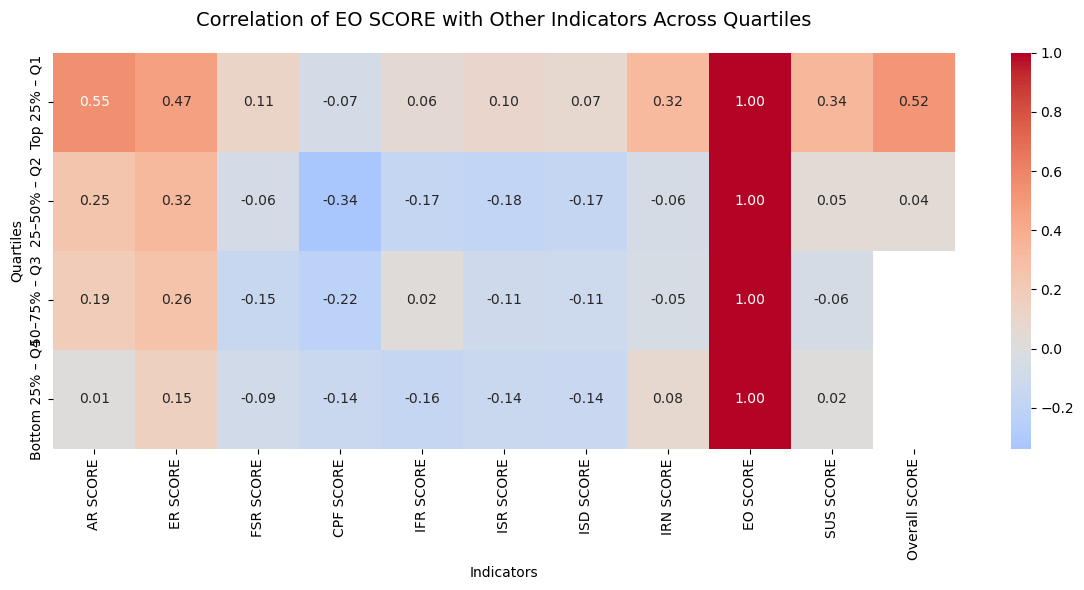

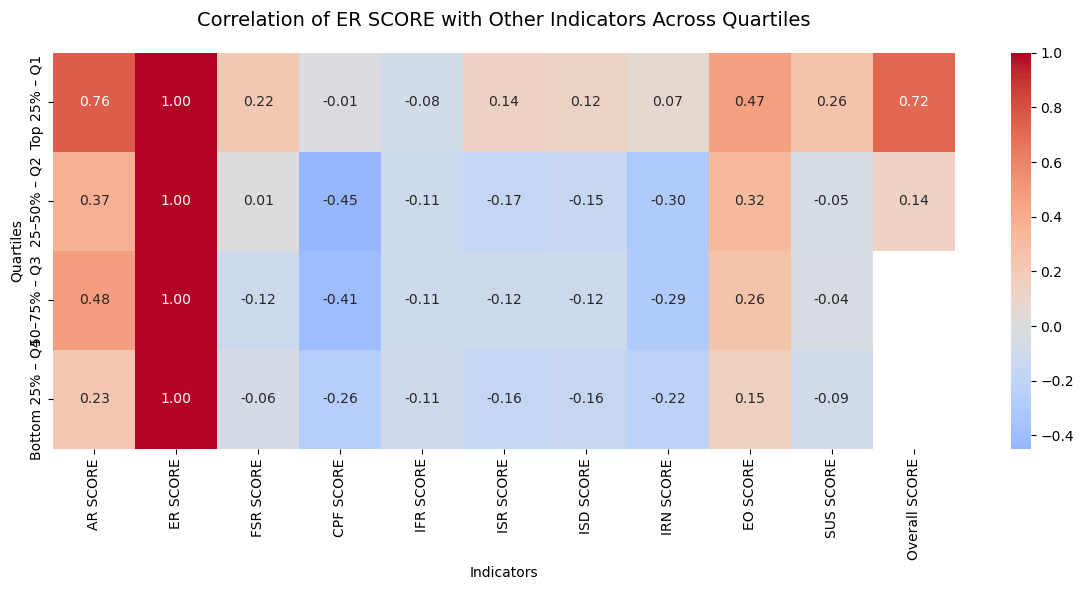

In [161]:
# Define the score columns
score_cols = ['AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE', 'IFR SCORE',
              'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 'EO SCORE', 'SUS SCORE', 'Overall SCORE']

# Function to create correlation summary table for a target score
def correlation_summary(target_score):
    data = []
    quartiles = [df1scores, df2scores, df3scores, df4scores]
    labels = ["Top 25% – Q1", "25–50% – Q2", "50–75% – Q3", "Bottom 25% – Q4"]
    
    for df_quartile in quartiles:
        corr = df_quartile[score_cols].corr(numeric_only=True)[target_score]
        data.append(corr.values)
    
    summary = pd.DataFrame(data, columns=score_cols, index=labels)
    return summary

# Generate summary tables
fsr_summary = correlation_summary("FSR SCORE")
eo_summary = correlation_summary("EO SCORE")
er_summary = correlation_summary("ER SCORE")

# Function to plot heatmap
def plot_heatmap(summary_df, title):
    plt.figure(figsize=(12, 6))
    sns.heatmap(summary_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel("Quartiles")
    plt.xlabel("Indicators")
    plt.tight_layout()
    plt.show()

# Plot heatmaps
plot_heatmap(fsr_summary, "Correlation of FSR SCORE with Other Indicators Across Quartiles")
plot_heatmap(eo_summary, "Correlation of EO SCORE with Other Indicators Across Quartiles")
plot_heatmap(er_summary, "Correlation of ER SCORE with Other Indicators Across Quartiles")


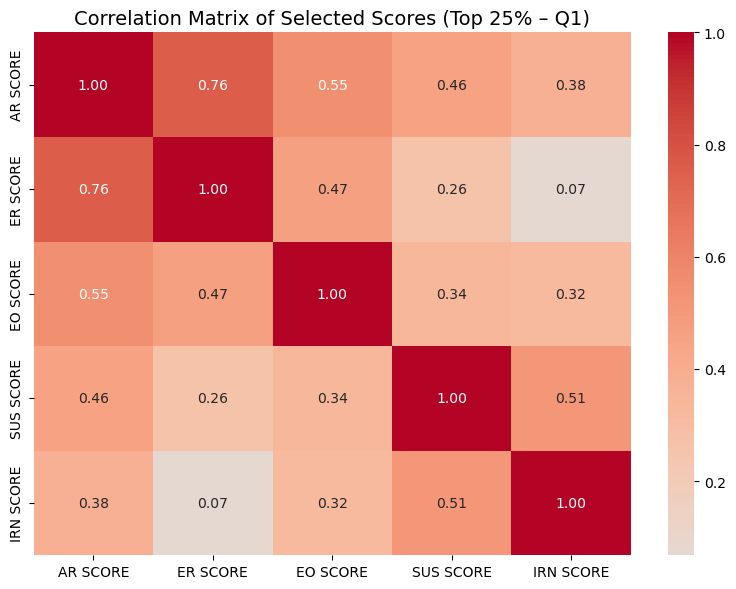

In [162]:
# Select only Q1 (Top 25%) and the chosen scores
q1_scores = df1scores[['AR SCORE', 'ER SCORE', 'EO SCORE', 'SUS SCORE', 'IRN SCORE']]

# Compute correlation matrix
corr_matrix = q1_scores.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix of Selected Scores (Top 25% – Q1)", fontsize=14)
plt.tight_layout()
plt.show()

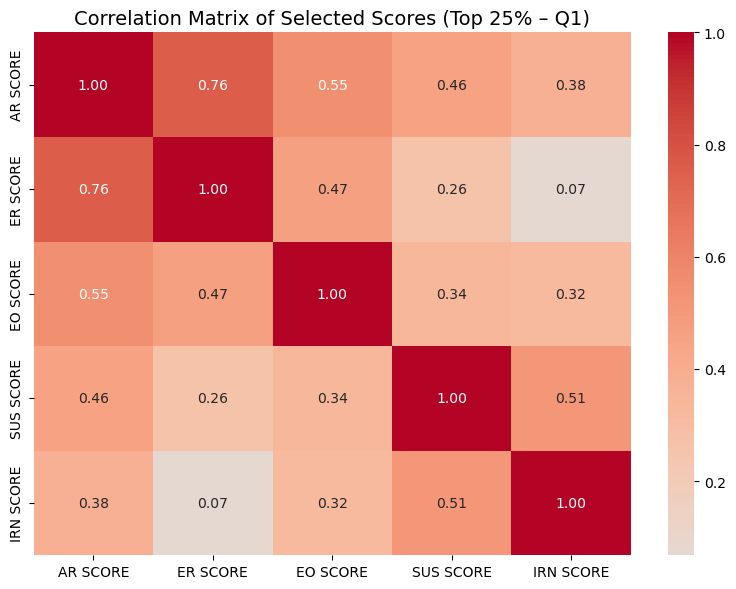

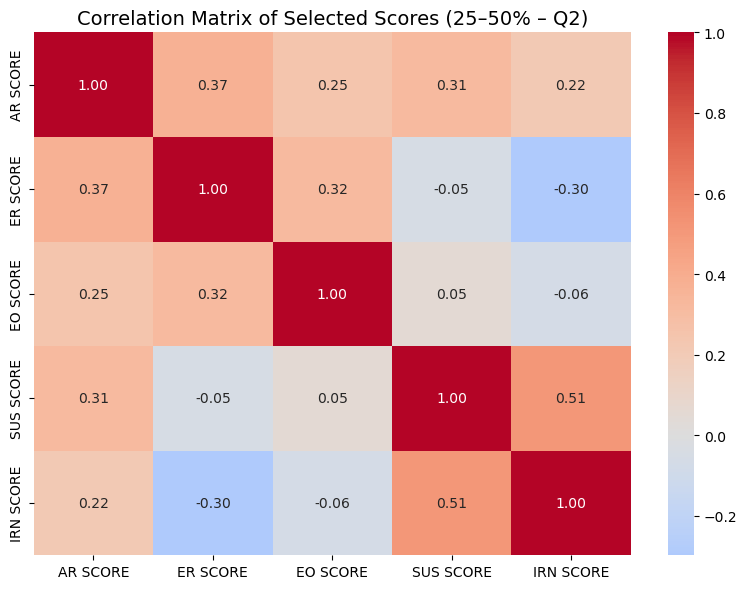

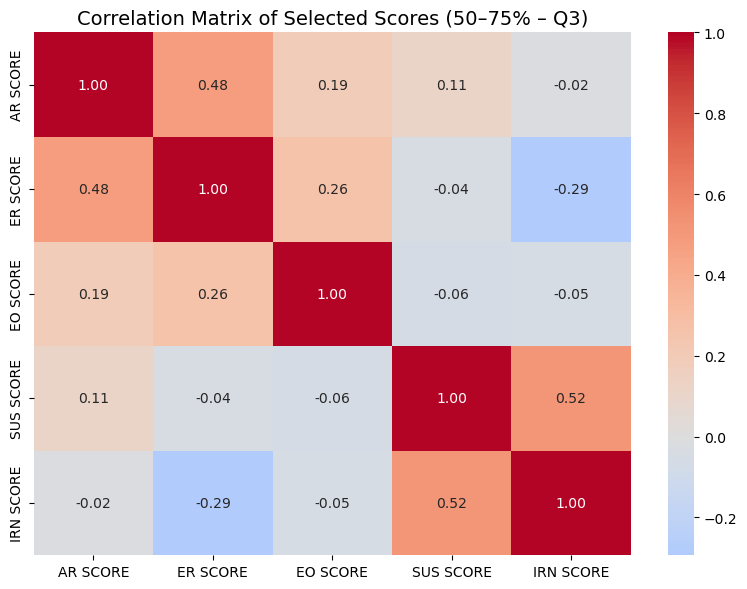

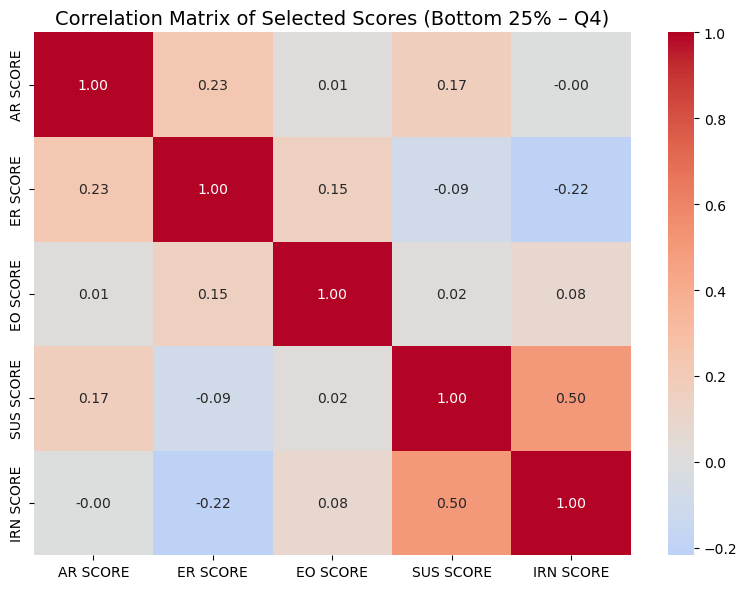

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of quartiles and labels
quartiles = [df1scores, df2scores, df3scores, df4scores]
labels = ["Top 25% – Q1", "25–50% – Q2", "50–75% – Q3", "Bottom 25% – Q4"]

# Selected scores
selected_scores = ['AR SCORE', 'ER SCORE', 'EO SCORE', 'SUS SCORE', 'IRN SCORE']

# Loop through quartiles and plot heatmaps
for df_quartile, label in zip(quartiles, labels):
    # Select only the chosen scores
    scores = df_quartile[selected_scores]
    
    # Compute correlation matrix
    corr_matrix = scores.corr()
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title(f"Correlation Matrix of Selected Scores ({label})", fontsize=14)
    plt.tight_layout()
    plt.show()


/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


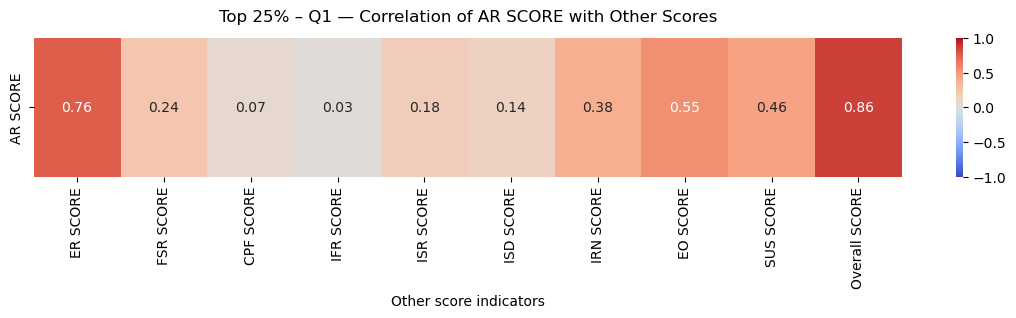

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


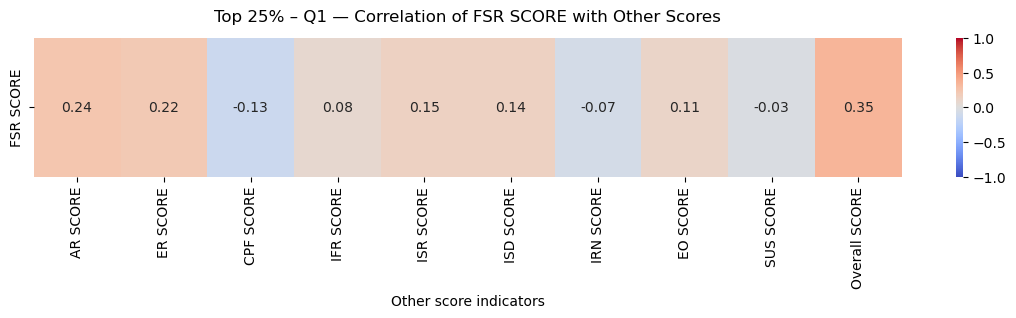

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


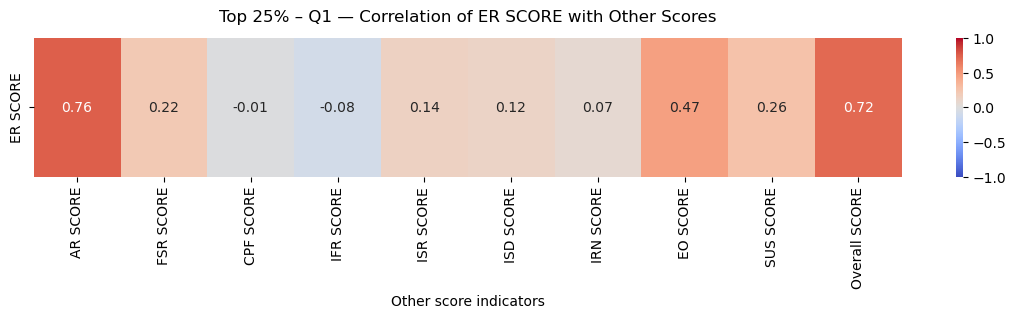

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


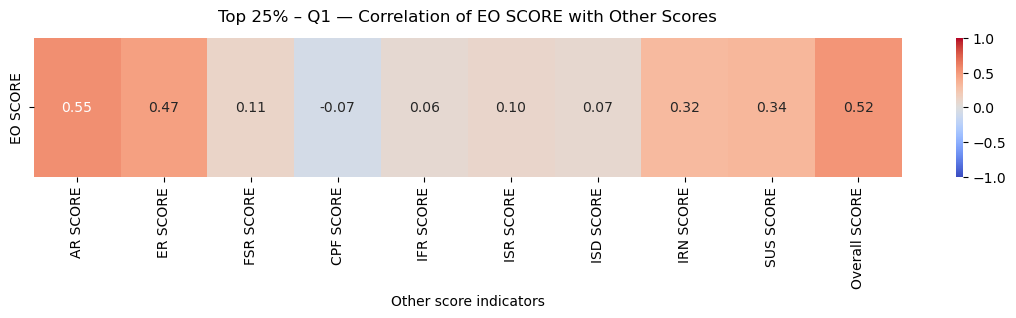

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


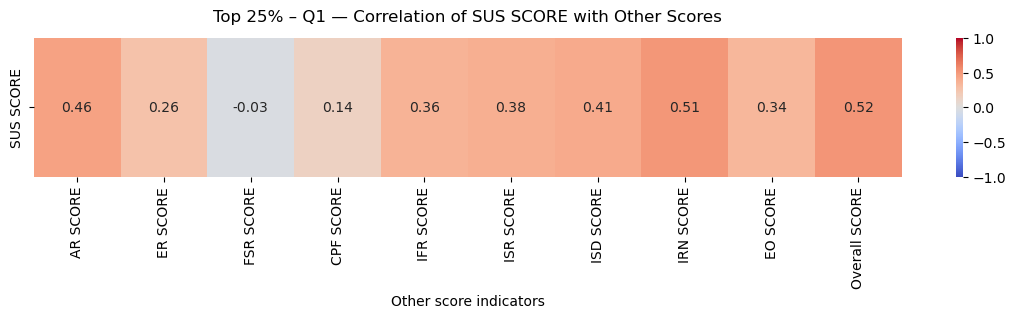

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


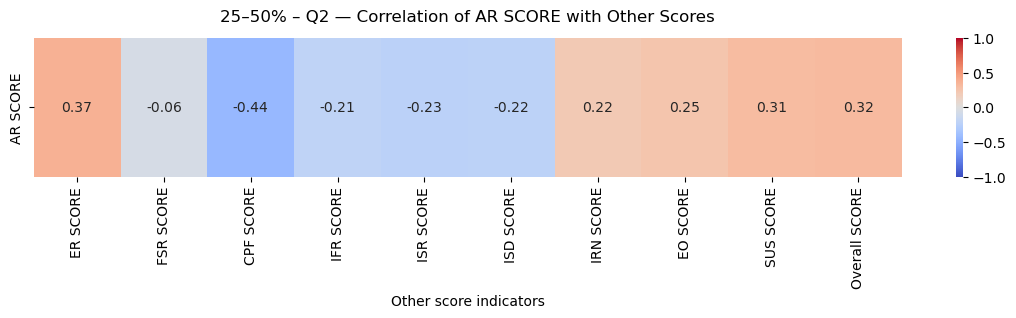

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


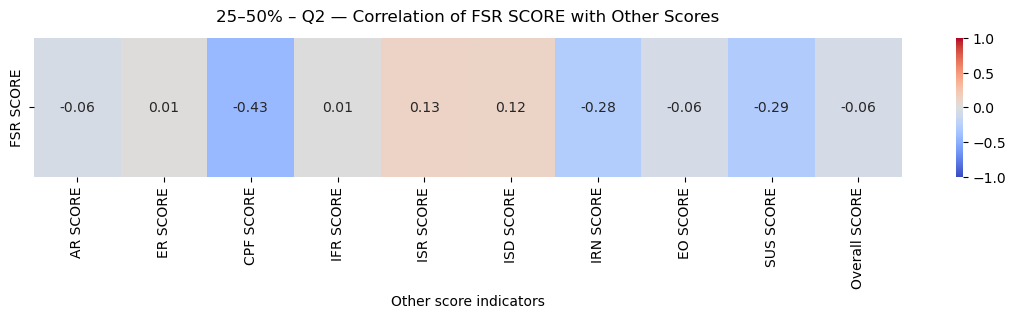

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


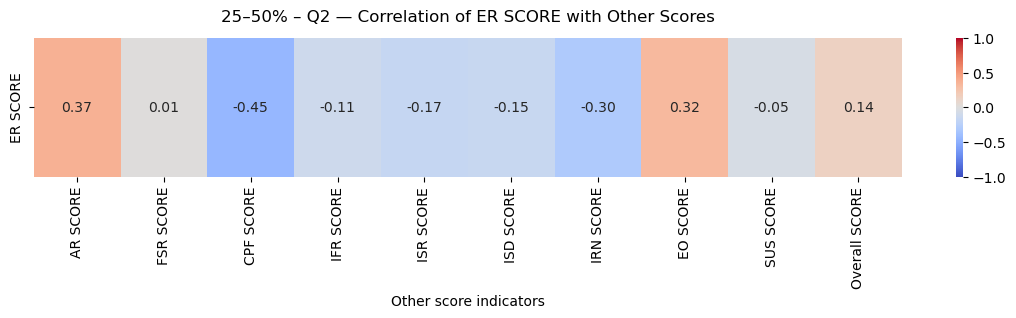

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


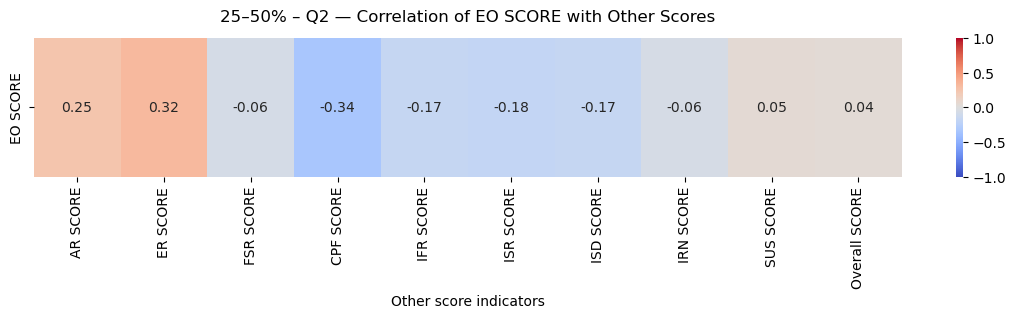

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


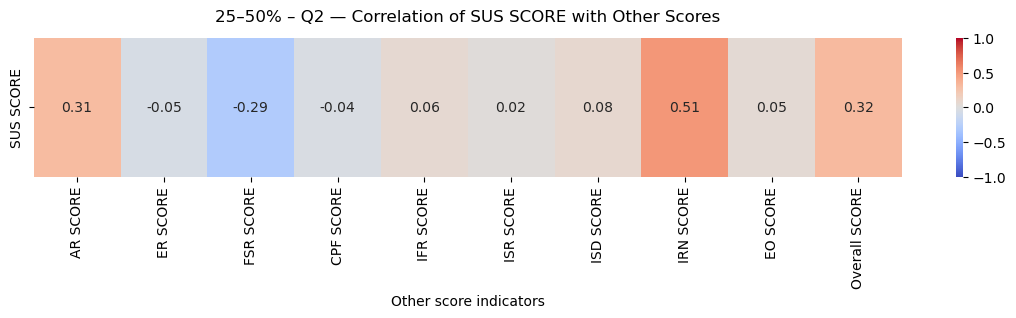

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


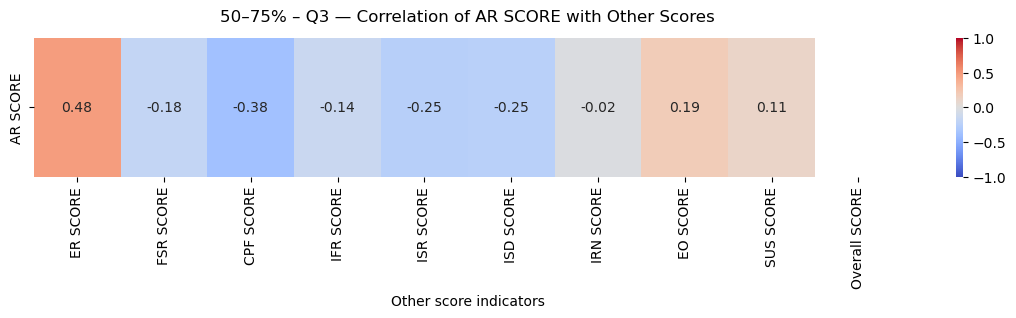

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


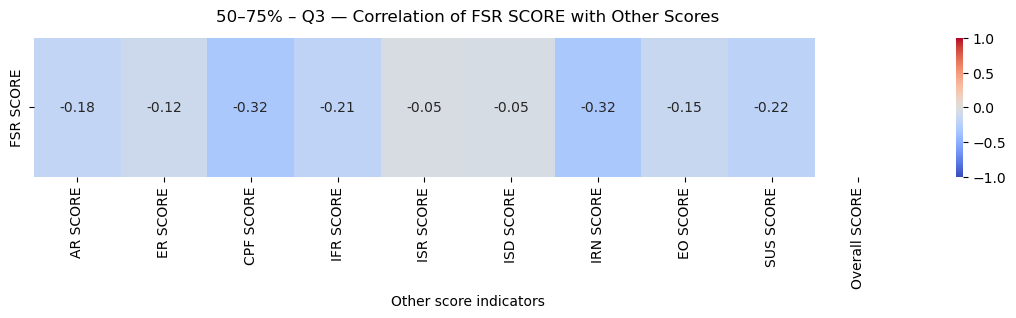

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


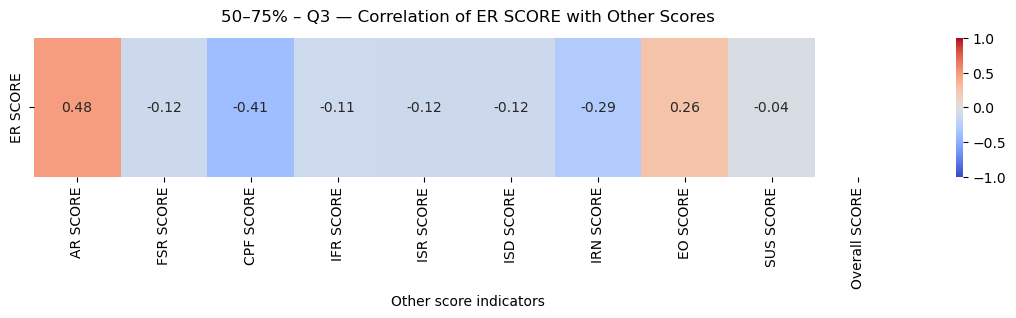

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


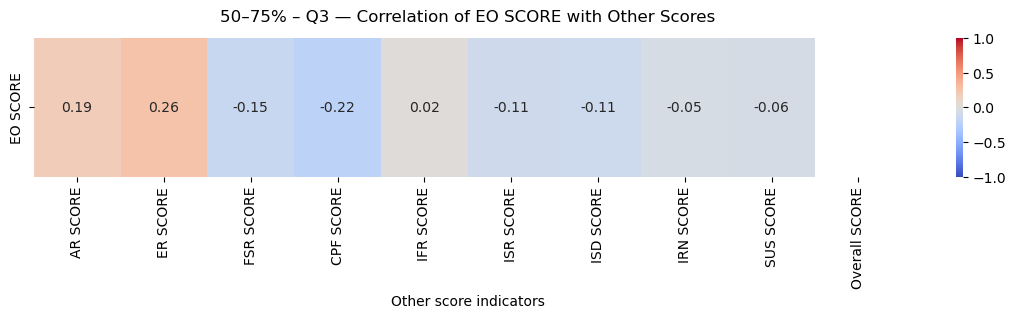

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


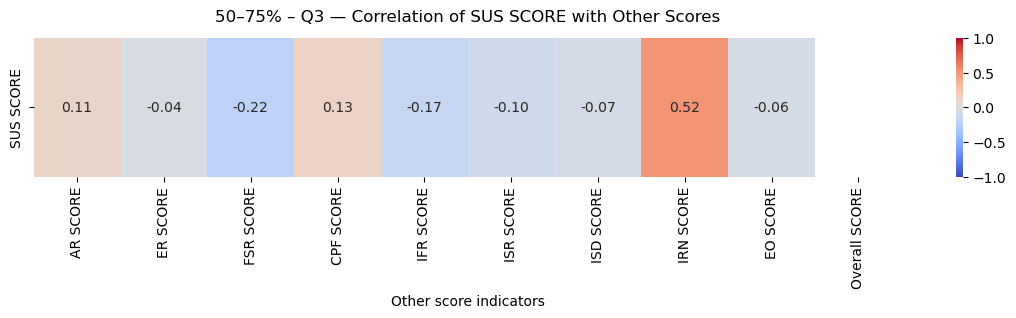

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


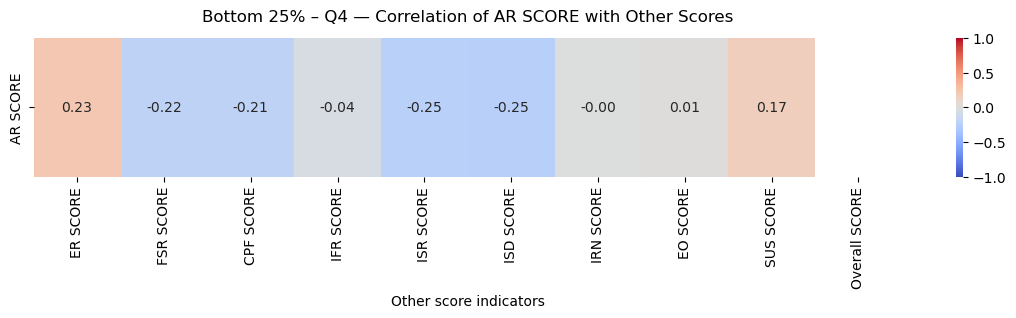

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


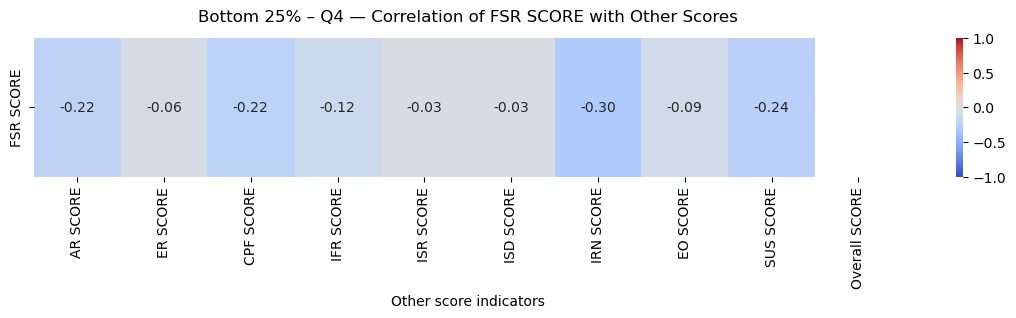

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


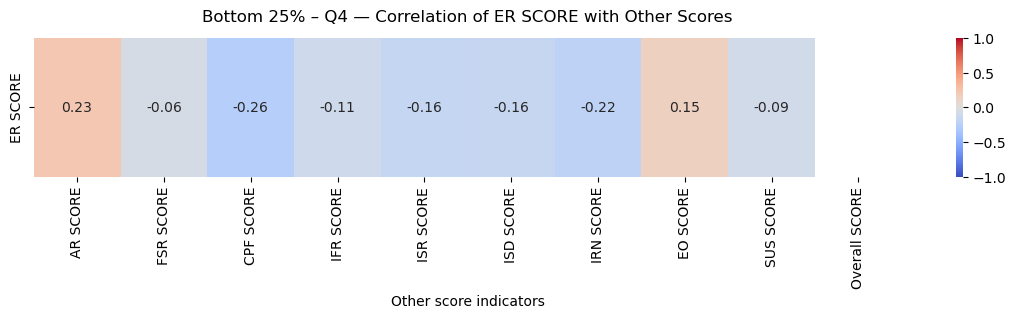

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


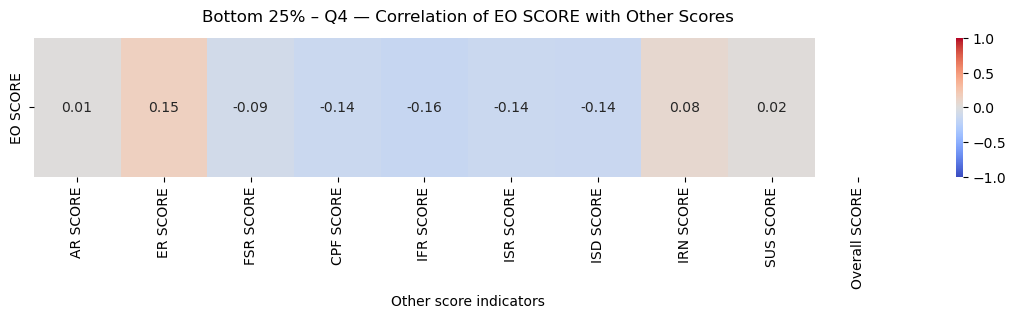

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/4003389871.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


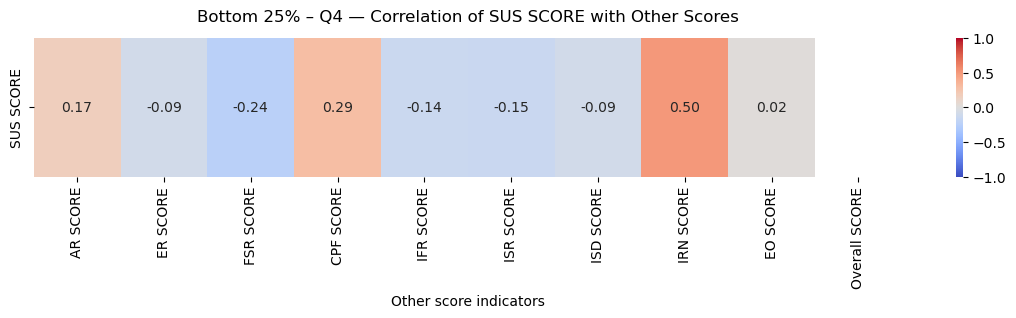

In [163]:
score_cols = [
    'AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE', 'IFR SCORE',
    'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 'EO SCORE', 'SUS SCORE', 'Overall SCORE'
]

targets = ['AR SCORE', 'FSR SCORE', 'ER SCORE', 'EO SCORE', 'SUS SCORE']

quartiles = [
    ('Top 25% – Q1', df1scores),
    ('25–50% – Q2', df2scores),
    ('50–75% – Q3', df3scores),
    ('Bottom 25% – Q4', df4scores),
]

def plot_target_vs_others_heatmap(df_quartile, quartile_label, target, save=False, save_dir='.'.rstrip('/')):
    # Compute correlation matrix on score columns only
    corr = df_quartile[score_cols].corr(numeric_only=True)

    # Pull the row for the target and drop self-correlation
    # Keep the original order of score_cols (without target)
    others = [c for c in score_cols if c != target]
    series = corr.loc[target, others]

    # Make it a 1-row DataFrame for a clean 1×N heatmap
    one_row = pd.DataFrame([series.values], columns=others, index=[target])

    # Plot
    plt.figure(figsize=(14, 1.8))  # wide & short for readability
    sns.heatmap(
        one_row,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=0,
        vmin=-1, vmax=1,
        cbar=True
    )
    plt.title(f"{quartile_label} — Correlation of {target} with Other Scores", pad=12)
    plt.xlabel("Other score indicators")
    plt.ylabel("")  # cleaner
    plt.tight_layout()

    if save:
        # optional saving; change folder if you want
        safe_target = target.replace(' ', '').replace('/', '')
        safe_quart = quartile_label.replace(' ', '_').replace('–', '-')
        plt.savefig(f"{save_dir}/heatmap_{safe_target}_vs_all_{safe_quart}.png", dpi=300, bbox_inches='tight')

    plt.show()

for quartile_label, dfq in quartiles:
    for target in targets:
        plot_target_vs_others_heatmap(dfq, quartile_label, target, save=False)

In [164]:
score_cols = [
    'AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE', 'IFR SCORE',
    'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 'EO SCORE', 'SUS SCORE', 'Overall SCORE'
]

targets = ['AR SCORE', 'FSR SCORE', 'ER SCORE', 'EO SCORE', 'SUS SCORE']
quartiles = [
    ('Top 25% – Q1', df1scores),
    ('25–50% – Q2', df2scores),
    ('50–75% – Q3', df3scores),
    ('Bottom 25% – Q4', df4scores),
]

# Empty list to collect results
results = []

for quart_label, dfq in quartiles:
    corr_matrix = dfq[score_cols].corr(numeric_only=True)
    for target in targets:
        for other in score_cols:
            if target != other:  # skip self-correlation
                results.append({
                    "Quartile": quart_label,
                    "Target": target,
                    "Other_Score": other,
                    "Correlation": corr_matrix.loc[target, other]
                })

# Create DataFrame
corr_long = pd.DataFrame(results)

# Save for Tableau
corr_long.to_csv("correlations_quartiles_long.csv", index=False)

In [111]:
corr_long.head()

,Quartile,Target,Other_Score,Correlation
0,Top 25% – Q1,AR SCORE,ER SCORE,0.756900
1,Top 25% – Q1,AR SCORE,FSR SCORE,0.236853
2,Top 25% – Q1,AR SCORE,CPF SCORE,0.071254
3,Top 25% – Q1,AR SCORE,IFR SCORE,0.027976
4,Top 25% – Q1,AR SCORE,ISR SCORE,0.179523


In [112]:
# Define all score columns
score_cols = [
    'AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE', 'IFR SCORE',
    'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 'EO SCORE', 'SUS SCORE', 'Overall SCORE'
]

# Quartiles
quartiles = [
    ('Top 25% – Q1', df1scores),
    ('25–50% – Q2', df2scores),
    ('50–75% – Q3', df3scores),
    ('Bottom 25% – Q4', df4scores),
]

# Collect results
results = []

for quart_label, dfq in quartiles:
    corr_matrix = dfq[score_cols].corr(numeric_only=True)
    # Convert wide matrix → long format
    corr_long = corr_matrix.reset_index().melt(id_vars="index")
    corr_long.columns = ["Score1", "Score2", "Correlation"]
    corr_long["Quartile"] = quart_label
    results.append(corr_long)

# Combine all quartiles
corr_all_quartiles = pd.concat(results, ignore_index=True)

# Save for Tableau
corr_all_quartiles.to_csv("correlations_full_quartiles.csv", index=False)

In [113]:
corr_all_quartiles.head(15)

,Score1,Score2,Correlation,Quartile
0,AR SCORE,AR SCORE,1.000000,Top 25% – Q1
1,ER SCORE,AR SCORE,0.756900,Top 25% – Q1
2,FSR SCORE,AR SCORE,0.236853,Top 25% – Q1
3,CPF SCORE,AR SCORE,0.071254,Top 25% – Q1
4,IFR SCORE,AR SCORE,0.027976,Top 25% – Q1
5,ISR SCORE,AR SCORE,0.179523,Top 25% – Q1
6,ISD SCORE,AR SCORE,0.144037,Top 25% – Q1
7,IRN SCORE,AR SCORE,0.384299,Top 25% – Q1
8,EO SCORE,AR SCORE,0.554037,Top 25% – Q1
9,SUS SCORE,AR SCORE,0.456296,Top 25% – Q1


In [115]:
df1scores.shape

(375, 19)

In [116]:
# Drop rows where any of these columns are NaN
df1scores_clean = df1scores.dropna(subset=['SUS SCORE', 'ER SCORE', 'CPF SCORE'])

In [120]:
df1scores_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 0 to 374
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank_num           374 non-null    float64
 1   Name               374 non-null    object 
 2   Country/Territory  374 non-null    object 
 3   Region             374 non-null    object 
 4   Size               374 non-null    object 
 5   Focus              374 non-null    object 
 6   Research           374 non-null    object 
 7   Status             374 non-null    object 
 8   AR SCORE           374 non-null    float64
 9   ER SCORE           374 non-null    float64
 10  FSR SCORE          374 non-null    float64
 11  CPF SCORE          374 non-null    float64
 12  IFR SCORE          372 non-null    float64
 13  ISR SCORE          374 non-null    float64
 14  ISD SCORE          374 non-null    float64
 15  IRN SCORE          374 non-null    float64
 16  EO SCORE           374 non-null

In [121]:
df2scores.shape

(376, 19)

In [122]:
# Drop rows where any of these columns are NaN
df2scores_clean = df2scores.dropna(subset=['SUS SCORE', 'ER SCORE', 'CPF SCORE'])

In [123]:
df2scores_clean.shape

(375, 19)

In [124]:
df3scores.shape

(376, 19)

In [126]:
# Drop rows where any of these columns are NaN
df3scores_clean = df3scores.dropna(subset=['SUS SCORE', 'ER SCORE', 'CPF SCORE'])

In [127]:
df3scores_clean.shape

(364, 19)

In [125]:
df4scores.shape

(376, 19)

In [128]:
# Drop rows where any of these columns are NaN
df4scores_clean = df3scores.dropna(subset=['SUS SCORE', 'ER SCORE', 'CPF SCORE'])

In [129]:
df4scores_clean.shape

(364, 19)

In [133]:
df2scores_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 375 to 748
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank_num           375 non-null    float64
 1   Name               375 non-null    object 
 2   Country/Territory  375 non-null    object 
 3   Region             375 non-null    object 
 4   Size               375 non-null    object 
 5   Focus              375 non-null    object 
 6   Research           375 non-null    object 
 7   Status             375 non-null    object 
 8   AR SCORE           375 non-null    float64
 9   ER SCORE           375 non-null    float64
 10  FSR SCORE          375 non-null    float64
 11  CPF SCORE          375 non-null    float64
 12  IFR SCORE          359 non-null    float64
 13  ISR SCORE          371 non-null    float64
 14  ISD SCORE          371 non-null    float64
 15  IRN SCORE          375 non-null    float64
 16  EO SCORE           375 non-nu

In [131]:
df4scores_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 749 to 1101
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank_num           364 non-null    float64
 1   Name               364 non-null    object 
 2   Country/Territory  364 non-null    object 
 3   Region             364 non-null    object 
 4   Size               364 non-null    object 
 5   Focus              364 non-null    object 
 6   Research           364 non-null    object 
 7   Status             364 non-null    object 
 8   AR SCORE           364 non-null    float64
 9   ER SCORE           364 non-null    float64
 10  FSR SCORE          364 non-null    float64
 11  CPF SCORE          364 non-null    float64
 12  IFR SCORE          336 non-null    float64
 13  ISR SCORE          351 non-null    float64
 14  ISD SCORE          351 non-null    float64
 15  IRN SCORE          364 non-null    float64
 16  EO SCORE           364 non-n

In [134]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# --- Config ---
predictors = ['ER SCORE', 'CPF SCORE', 'SUS SCORE']
target = 'AR SCORE'

def run_std_linreg(df, label):
    """Run standardized linear regression and return R² + coefficients."""
    use_cols = predictors + [target]
    d = df[use_cols].dropna().copy()
    if d.empty:
        return {'Quartile': label, 'R2': None, **{p: None for p in predictors}, 'n': 0}

    X = d[predictors].values
    y = d[target].values.reshape(-1, 1)

    # Standardize predictors and target
    Xz = StandardScaler().fit_transform(X)
    yz = StandardScaler().fit_transform(y).ravel()

    model = LinearRegression().fit(Xz, yz)
    r2 = model.score(Xz, yz)

    out = {'Quartile': label, 'R2': r2, 'n': len(d)}
    out.update({p: coef for p, coef in zip(predictors, model.coef_)})
    return out

# --- Run regression for Q2, Q3, Q4 separately ---
results = []
results.append(run_std_linreg(df2scores_clean, '25–50% – Q2'))
results.append(run_std_linreg(df3scores_clean, '50–75% – Q3'))
results.append(run_std_linreg(df4scores_clean, 'Bottom 25% – Q4'))

# --- Run for Q2–Q4 combined ---
df_q2_q4_clean = pd.concat([df2scores_clean, df3scores_clean, df4scores_clean], ignore_index=True)
results.append(run_std_linreg(df_q2_q4_clean, 'Q2–Q4 combined'))

# --- Collect results ---
summary_AR = pd.DataFrame(results)[['Quartile', 'n', 'R2'] + predictors]
print(summary_AR)

          Quartile     n        R2  ER SCORE  CPF SCORE  SUS SCORE
0      25–50% – Q2   375  0.324125  0.243546  -0.315430   0.311055
1      50–75% – Q3   364  0.297470  0.387612  -0.242885   0.160234
2  Bottom 25% – Q4   364  0.297470  0.387612  -0.242885   0.160234
3   Q2–Q4 combined  1103  0.343005  0.433013  -0.136800   0.315546


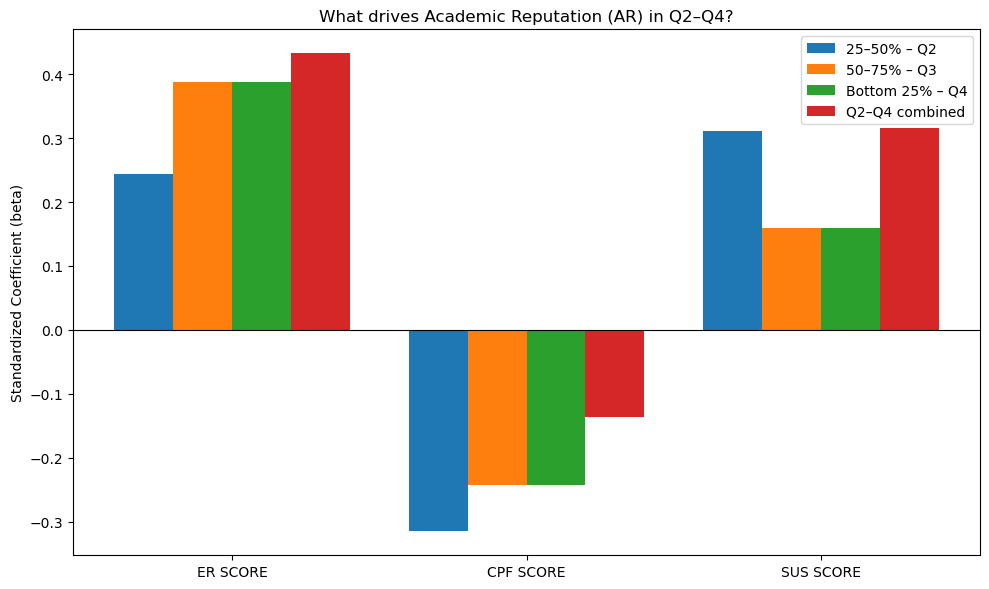

In [165]:
# Use the regression summary 
summary_AR_plot = summary_AR.copy()

# Melt for plotting (long format)
plot_df = summary_AR_plot.melt(
    id_vars=['Quartile'],
    value_vars=['ER SCORE', 'CPF SCORE', 'SUS SCORE'],
    var_name='Predictor',
    value_name='Coefficient'
)

# Plot
plt.figure(figsize=(10,6))
for i, q in enumerate(plot_df['Quartile'].unique()):
    subset = plot_df[plot_df['Quartile'] == q]
    plt.bar(
        [x + i*0.2 for x in range(len(subset))],
        subset['Coefficient'],
        width=0.2,
        label=q
    )

plt.axhline(0, color='black', linewidth=0.8)
plt.xticks([x+0.3 for x in range(len(subset))], subset['Predictor'])
plt.ylabel('Standardized Coefficient (beta)')
plt.title('What drives Academic Reputation (AR) in Q2–Q4?')
plt.legend()
plt.tight_layout()
plt.show()

         Quartile    n        R2  ER SCORE  CPF SCORE  SUS SCORE
0     25–50% – Q2  375  0.324125  0.243546  -0.315430   0.311055
1     50–75% – Q3  364  0.297470  0.387612  -0.242885   0.160234
2  Q2–Q3 combined  739  0.348918  0.406118  -0.152839   0.347280


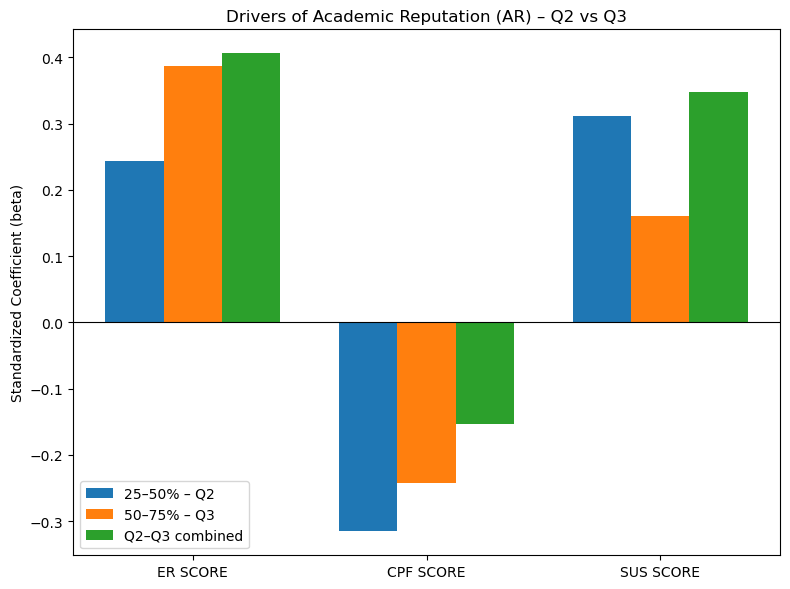

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# --- Config ---
predictors = ['ER SCORE', 'CPF SCORE', 'SUS SCORE']
target = 'AR SCORE'

def run_std_linreg(df, label):
    """Run standardized linear regression and return R² + coefficients."""
    use_cols = predictors + [target]
    d = df[use_cols].dropna().copy()
    if d.empty:
        return {'Quartile': label, 'R2': None, **{p: None for p in predictors}, 'n': 0}

    X = d[predictors].values
    y = d[target].values.reshape(-1, 1)

    # Standardize predictors and target
    Xz = StandardScaler().fit_transform(X)
    yz = StandardScaler().fit_transform(y).ravel()

    model = LinearRegression().fit(Xz, yz)
    r2 = model.score(Xz, yz)

    out = {'Quartile': label, 'R2': r2, 'n': len(d)}
    out.update({p: coef for p, coef in zip(predictors, model.coef_)})
    return out

# --- Run regression for Q2 and Q3 ---
results = []
results.append(run_std_linreg(df2scores_clean, '25–50% – Q2'))
results.append(run_std_linreg(df3scores_clean, '50–75% – Q3'))

# --- Run for Q2–Q3 combined ---
df_q2_q3_clean = pd.concat([df2scores_clean, df3scores_clean], ignore_index=True)
results.append(run_std_linreg(df_q2_q3_clean, 'Q2–Q3 combined'))

# --- Collect results ---
summary_AR_q2_q3 = pd.DataFrame(results)[['Quartile', 'n', 'R2'] + predictors]
print(summary_AR_q2_q3)

# --- Plot coefficients ---
plot_df = summary_AR_q2_q3.melt(
    id_vars=['Quartile'],
    value_vars=['ER SCORE', 'CPF SCORE', 'SUS SCORE'],
    var_name='Predictor',
    value_name='Coefficient'
)

plt.figure(figsize=(8,6))
for i, q in enumerate(plot_df['Quartile'].unique()):
    subset = plot_df[plot_df['Quartile'] == q]
    plt.bar(
        [x + i*0.25 for x in range(len(subset))],
        subset['Coefficient'],
        width=0.25,
        label=q
    )

plt.axhline(0, color='black', linewidth=0.8)
plt.xticks([x+0.25 for x in range(len(subset))], subset['Predictor'])
plt.ylabel('Standardized Coefficient (beta)')
plt.title('Drivers of Academic Reputation (AR) – Q2 vs Q3')
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
# --- Correlation values from your heatmap ---
corr_values = {
    '25–50% – Q2': {'ER SCORE': 0.372, 'CPF SCORE': -0.438, 'SUS SCORE': 0.311},
    '50–75% – Q3': {'ER SCORE': 0.483, 'CPF SCORE': -0.379, 'SUS SCORE': 0.114}
}
corr_df = pd.DataFrame(corr_values).T
corr_df['Type'] = 'Correlation'

# --- Regression results from summary ---
reg_values = {
    '25–50% – Q2': {'ER SCORE': 0.244, 'CPF SCORE': -0.315, 'SUS SCORE': 0.311},
    '50–75% – Q3': {'ER SCORE': 0.388, 'CPF SCORE': -0.243, 'SUS SCORE': 0.160}
}
reg_df = pd.DataFrame(reg_values).T
reg_df['Type'] = 'Regression'

# --- Combine both ---
compare_df = pd.concat([corr_df, reg_df])
compare_df = compare_df.reset_index().rename(columns={'index': 'Quartile'})

# --- Tidy output ---
compare_df = compare_df[['Quartile','Type','ER SCORE','CPF SCORE','SUS SCORE']]
print(compare_df)


      Quartile         Type  ER SCORE  CPF SCORE  SUS SCORE
0  25–50% – Q2  Correlation     0.372     -0.438      0.311
1  50–75% – Q3  Correlation     0.483     -0.379      0.114
2  25–50% – Q2   Regression     0.244     -0.315      0.311
3  50–75% – Q3   Regression     0.388     -0.243      0.160


/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3030/360429352.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_long, x='Predictor', y='Value', hue='Type', palette='Set1', ci=None)


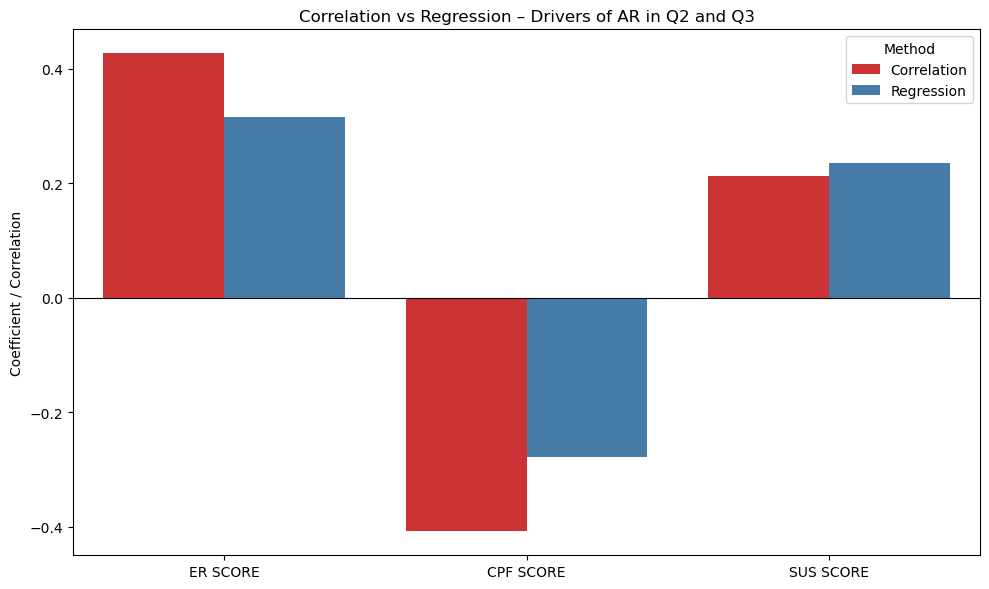

In [167]:
plot_data = {
    ('25–50% – Q2', 'Correlation'): {'ER SCORE': 0.372, 'CPF SCORE': -0.438, 'SUS SCORE': 0.311},
    ('25–50% – Q2', 'Regression'):  {'ER SCORE': 0.244, 'CPF SCORE': -0.315, 'SUS SCORE': 0.311},
    ('50–75% – Q3', 'Correlation'): {'ER SCORE': 0.483, 'CPF SCORE': -0.379, 'SUS SCORE': 0.114},
    ('50–75% – Q3', 'Regression'):  {'ER SCORE': 0.388, 'CPF SCORE': -0.243, 'SUS SCORE': 0.160}
}

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data).T.reset_index()
plot_df.columns = ['Quartile', 'Type', 'ER SCORE', 'CPF SCORE', 'SUS SCORE']

# Melt for plotting
plot_long = plot_df.melt(id_vars=['Quartile','Type'], 
                         value_vars=['ER SCORE','CPF SCORE','SUS SCORE'],
                         var_name='Predictor', value_name='Value')

# --- Plot ---
plt.figure(figsize=(10,6))
import seaborn as sns

sns.barplot(data=plot_long, x='Predictor', y='Value', hue='Type', palette='Set1', ci=None)

plt.axhline(0, color='black', linewidth=0.8)
plt.title('Correlation vs Regression – Drivers of AR in Q2 and Q3')
plt.ylabel('Coefficient / Correlation')
plt.xlabel('')
plt.legend(title='Method')
plt.tight_layout()
plt.show()

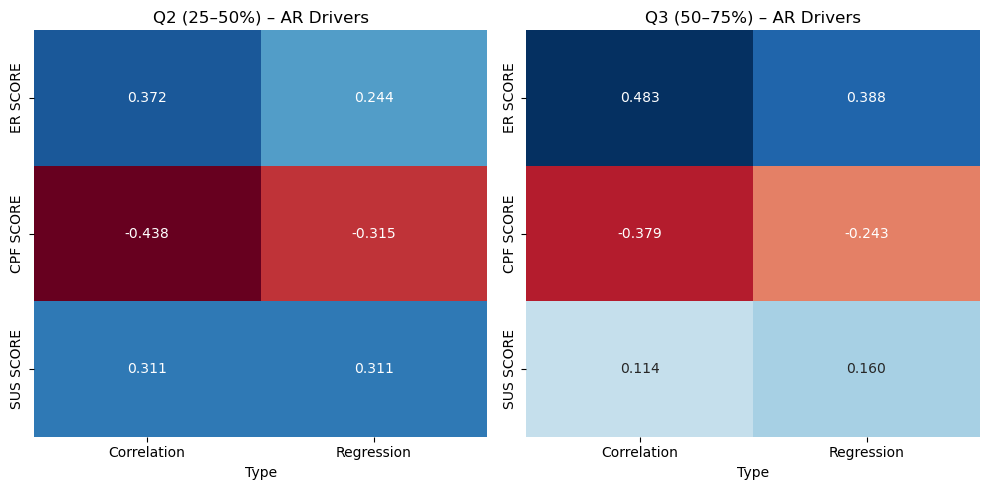

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data for plotting ---
heatmap_data = {
    ('25–50% – Q2', 'Correlation'): {'ER SCORE': 0.372, 'CPF SCORE': -0.438, 'SUS SCORE': 0.311},
    ('25–50% – Q2', 'Regression'):  {'ER SCORE': 0.244, 'CPF SCORE': -0.315, 'SUS SCORE': 0.311},
    ('50–75% – Q3', 'Correlation'): {'ER SCORE': 0.483, 'CPF SCORE': -0.379, 'SUS SCORE': 0.114},
    ('50–75% – Q3', 'Regression'):  {'ER SCORE': 0.388, 'CPF SCORE': -0.243, 'SUS SCORE': 0.160}
}

# Convert to DataFrame
df_heatmap = pd.DataFrame(heatmap_data).T.reset_index()
df_heatmap.columns = ['Quartile', 'Type', 'ER SCORE', 'CPF SCORE', 'SUS SCORE']

# Separate Q2 and Q3
df_q2 = df_heatmap[df_heatmap['Quartile'] == '25–50% – Q2'].set_index('Type')[['ER SCORE','CPF SCORE','SUS SCORE']]
df_q3 = df_heatmap[df_heatmap['Quartile'] == '50–75% – Q3'].set_index('Type')[['ER SCORE','CPF SCORE','SUS SCORE']]

# --- Plot heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.heatmap(df_q2.T, annot=True, cmap='RdBu', center=0, cbar=False, ax=axes[0], fmt=".3f")
axes[0].set_title('Q2 (25–50%) – AR Drivers')

sns.heatmap(df_q3.T, annot=True, cmap='RdBu', center=0, cbar=False, ax=axes[1], fmt=".3f")
axes[1].set_title('Q3 (50–75%) – AR Drivers')

plt.tight_layout()
plt.show()


In [143]:
# Data from before
data = {
    ('25–50% – Q2', 'Correlation'): {'ER SCORE': 0.372, 'CPF SCORE': -0.438, 'SUS SCORE': 0.311},
    ('25–50% – Q2', 'Regression'):  {'ER SCORE': 0.244, 'CPF SCORE': -0.315, 'SUS SCORE': 0.311},
    ('50–75% – Q3', 'Correlation'): {'ER SCORE': 0.483, 'CPF SCORE': -0.379, 'SUS SCORE': 0.114},
    ('50–75% – Q3', 'Regression'):  {'ER SCORE': 0.388, 'CPF SCORE': -0.243, 'SUS SCORE': 0.160}
}

# Convert to DataFrame
df = pd.DataFrame(data).T.reset_index()
df.columns = ['Quartile','Type','ER SCORE','CPF SCORE','SUS SCORE']

# Reshape to long format
df_long = df.melt(id_vars=['Quartile','Type'], 
                  value_vars=['ER SCORE','CPF SCORE','SUS SCORE'],
                  var_name='Predictor', 
                  value_name='Value')

# Save to CSV for Tableau
df_long.to_csv("heatmap_input_for_tableau.csv", index=False)
print(df_long.head())

      Quartile         Type  Predictor  Value
0  25–50% – Q2  Correlation   ER SCORE  0.372
1  25–50% – Q2   Regression   ER SCORE  0.244
2  50–75% – Q3  Correlation   ER SCORE  0.483
3  50–75% – Q3   Regression   ER SCORE  0.388
4  25–50% – Q2  Correlation  CPF SCORE -0.438


In [159]:
# 1) Label quartiles
df1scores['Quartile'] = 'Q1 (Top 25%)'
df2scores['Quartile'] = 'Q2 (25–50%)'
df3scores['Quartile'] = 'Q3 (50–75%)'
df4scores['Quartile'] = 'Q4 (Bottom 25%)'

# 2) Combine
df_all = pd.concat([df1scores, df2scores, df3scores, df4scores], ignore_index=True)

# 3) Score columns to include
score_cols = ['AR SCORE','ER SCORE','FSR SCORE','CPF SCORE','IFR SCORE',
              'ISR SCORE','ISD SCORE','IRN SCORE','EO SCORE','SUS SCORE','Overall SCORE']

# 4) Long format WITH identifiers (prevents unwanted aggregation)
id_cols = ['Quartile', 'Name', 'Rank_num', 'Country/Territory', 'Region', 'Size', 'Focus', 'Research', 'Status']
df_long = df_all.melt(id_vars=id_cols, value_vars=score_cols,
                      var_name='Score', value_name='Value').dropna(subset=['Value'])

# 5) Summary stats per Quartile & Score (optional for a table)
summary_stats = (df_long.groupby(['Quartile','Score'])['Value']
                 .agg(['mean','median','min','max','std','count'])
                 .reset_index())

# 6) Save
out_dir = "/Users/woodoooo/Desktop/02 Data/Prepared Data"
os.makedirs(out_dir, exist_ok=True)
df_long.to_csv(os.path.join(out_dir, "quartiles_scores_long_2.0.csv"), index=False)
summary_stats.to_csv(os.path.join(out_dir, "quartiles_scores_summary_2.0.csv"), index=False)